<a href="https://colab.research.google.com/github/nicro23/Exercises/blob/main/HR_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##0. Importing Libraries

In [39]:
#import numpy, pandas, matplotlib, selected imports from sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 1. Overview



###Goal:

  Create a classification model that is based on a Human Resources Dataset of a certain company to predict and forecast employee attrition

###Methodology:

1. Pre-process data to be in the appropriate form for the model
2. Split the data to two sets: training set, testing set
3. Train two models: Logistic Regression model, Random Forest model
4. Evaluate and compare the two models and select the more fitting
5. Deploy the model

##2. Data Pre-processing

###1. Data Overview

In [40]:
#print the full data
np.set_printoptions(legacy='1.13')
pd.options.display.max_columns = 500
#perf+emp+w/ new att
#per+emp w/o new att
#perf+emp w/o amount rated
emp_df = pd.read_csv("/content/drive/MyDrive/Depi/Employee&Performance_Cleaned_NAR.csv")
#perf+emp w/ amount rated
# emp_df = pd.read_csv("/content/drive/MyDrive/Depi/Employee&Performance_Cleaned.csv")
#old
# emp_df = pd.read_csv("/content/drive/MyDrive/Depi/Cleaned_Employee.csv")
emp_df

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,AvgEnvironmentSatisfaction,AvgJobSatisfaction,AvgRelationshipSatisfaction,AvgTrainingOpportunitiesWithinYear,AvgTrainingOpportunitiesTaken,AvgWorkLifeBalance,AvgSelfRating,AvgManagerRating
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,3/1/2012,No,10,4,9,7,3.5556,3.6667,3.3333,2.0000,0.3333,3.3333,4.1111,3.5556
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,4,Marketing,Sales Executive,Single,157718,0,Yes,4/1/2012,No,10,6,10,0,3.8889,3.3333,3.7778,2.4444,0.7778,3.0000,4.2222,3.8889
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,4,Marketing,HR Business Partner,Married,309964,1,No,4/1/2012,No,10,6,10,8,3.8889,3.5556,2.8889,2.1111,0.6667,3.7778,3.5556,3.0000
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,3,Computer Science,Engineering Manager,Married,293132,0,No,5/1/2012,No,10,10,10,0,3.2222,4.0000,3.3333,2.0000,1.3333,2.7778,3.8889,3.5556
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,2,Technical Degree,Recruiter,Single,49606,0,No,5/1/2012,Yes,6,1,1,6,4.0000,3.4444,3.7778,1.7778,1.3333,4.3333,3.7778,3.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,467E-977A,Jud,Melanaphy,Male,20,Some Travel,Technology,28,CA,Black or African American,2,Computer Science,Software Engineer,Single,38508,0,No,26/12/2022,No,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1466,6FB9-A624,Marc,Calver,Non-Binary,27,Some Travel,Technology,8,CA,Black or African American,3,Business Studies,Senior Software Engineer,Single,92995,3,No,30/12/2022,No,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1467,EBF4-5928,Rudolph,MacDearmont,Male,21,Some Travel,Sales,4,CA,Black or African American,4,Marketing,Sales Executive,Single,63375,0,No,30/12/2022,No,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1468,60E6-B1D9,Merill,Agg,Male,21,Some Travel,Technology,7,CA,Black or African American,3,Information Systems,Data Scientist,Married,46521,0,No,30/12/2022,No,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [41]:
emp_df.Gender.value_counts()

,count
Gender,
Female,675
Male,651
Non-Binary,124
Prefer Not To Say,20


In [42]:
# Binary: Overtime, Attrition
emp_df['Attrition'] = emp_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
emp_df['OverTime'] = emp_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
print(emp_df.OverTime.value_counts(), emp_df.Attrition.value_counts())

OverTime
0    1054
1     416
Name: count, dtype: int64 Attrition
0    1233
1     237
Name: count, dtype: int64


In [43]:
# One Hot Encode: Gender, Ethnicity, Education Field, Job Role, Marital Status, Deptartment, State, Bus travel*
emp_df = emp_df.join(pd.get_dummies(emp_df['Gender'],prefix='Gender')).drop('Gender', axis = 1)
emp_df = emp_df.join(pd.get_dummies(emp_df['BusinessTravel'], prefix = 'Travel')).drop('BusinessTravel', axis=1)
emp_df = emp_df.join(pd.get_dummies(emp_df['Department'], prefix = 'Department')).drop('Department', axis = 1)
emp_df = emp_df.join(pd.get_dummies(emp_df['Ethnicity'], prefix = 'Ethnicity')).drop('Ethnicity', axis = 1)
emp_df = emp_df.join(pd.get_dummies(emp_df['EducationField'], prefix = 'Field')).drop('EducationField', axis = 1)
emp_df = emp_df.join(pd.get_dummies(emp_df['JobRole'],prefix = 'Role')).drop('JobRole', axis = 1)
emp_df = emp_df.join(pd.get_dummies(emp_df['State'], prefix = 'State')).drop('State', axis = 1)
emp_df = emp_df.join(pd.get_dummies(emp_df['MaritalStatus'], prefix='Status')).drop('MaritalStatus', axis = 1)
emp_df

,EmployeeID,FirstName,LastName,Age,DistanceFromHome (KM),Education,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,AvgEnvironmentSatisfaction,AvgJobSatisfaction,AvgRelationshipSatisfaction,AvgTrainingOpportunitiesWithinYear,AvgTrainingOpportunitiesTaken,AvgWorkLifeBalance,AvgSelfRating,AvgManagerRating,Gender_Female,Gender_Male,Gender_Non-Binary,Gender_Prefer Not To Say,Travel_Frequent Traveller,Travel_No Travel,Travel_Some Travel,Department_Human Resources,Department_Sales,Department_Technology,Ethnicity_American Indian or Alaska Native,Ethnicity_Asian or Asian American,Ethnicity_Black or African American,Ethnicity_Mixed or multiple ethnic groups,Ethnicity_Native Hawaiian,Ethnicity_Other,Ethnicity_White,Field_Business Studies,Field_Computer Science,Field_Economics,Field_Human Resources,Field_Information Systems,Field_Marketing,Field_Other,Field_Technical Degree,Role_Analytics Manager,Role_Data Scientist,Role_Engineering Manager,Role_HR Business Partner,Role_HR Executive,Role_HR Manager,Role_Machine Learning Engineer,Role_Manager,Role_Recruiter,Role_Sales Executive,Role_Sales Representative,Role_Senior Software Engineer,Role_Software Engineer,State_CA,State_IL,State_NY,Status_Divorced,Status_Married,Status_Single
0,3012-1A41,Leonelle,Simco,30,27,5,102059,1,0,3/1/2012,0,10,4,9,7,3.5556,3.6667,3.3333,2.0000,0.3333,3.3333,4.1111,3.5556,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False
1,CBCB-9C9D,Leonerd,Aland,38,23,4,157718,0,1,4/1/2012,0,10,6,10,0,3.8889,3.3333,3.7778,2.4444,0.7778,3.0000,4.2222,3.8889,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True
2,95D7-1CE9,Ahmed,Sykes,43,29,4,309964,1,0,4/1/2012,0,10,6,10,8,3.8889,3.5556,2.8889,2.1111,0.6667,3.7778,3.5556,3.0000,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
3,47A0-559B,Ermentrude,Berrie,39,12,3,293132,0,0,5/1/2012,0,10,10,10,0,3.2222,4.0000,3.3333,2.0000,1.3333,2.7778,3.8889,3.5556,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,42CC-040A,Stace,Savege,29,29,2,49606,0,0,5/1/2012,1,6,1,1,6,4.0000,3.4444,3.7778,1.7778,1.3333,4.3333,3.7778,3.0000,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,467E-977A,Jud,Melanaphy,20,28,2,38508,0,0,26/12/2022,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True
1466,6FB9-A624,Marc,Calver,27,8,3,92995,3,0,30/12/2022,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,False,False,True,Fa

In [44]:
emp_df = emp_df.map(lambda x: 1 if x == True else 0 if x == False else x)
emp_df

,EmployeeID,FirstName,LastName,Age,DistanceFromHome (KM),Education,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,AvgEnvironmentSatisfaction,AvgJobSatisfaction,AvgRelationshipSatisfaction,AvgTrainingOpportunitiesWithinYear,AvgTrainingOpportunitiesTaken,AvgWorkLifeBalance,AvgSelfRating,AvgManagerRating,Gender_Female,Gender_Male,Gender_Non-Binary,Gender_Prefer Not To Say,Travel_Frequent Traveller,Travel_No Travel,Travel_Some Travel,Department_Human Resources,Department_Sales,Department_Technology,Ethnicity_American Indian or Alaska Native,Ethnicity_Asian or Asian American,Ethnicity_Black or African American,Ethnicity_Mixed or multiple ethnic groups,Ethnicity_Native Hawaiian,Ethnicity_Other,Ethnicity_White,Field_Business Studies,Field_Computer Science,Field_Economics,Field_Human Resources,Field_Information Systems,Field_Marketing,Field_Other,Field_Technical Degree,Role_Analytics Manager,Role_Data Scientist,Role_Engineering Manager,Role_HR Business Partner,Role_HR Executive,Role_HR Manager,Role_Machine Learning Engineer,Role_Manager,Role_Recruiter,Role_Sales Executive,Role_Sales Representative,Role_Senior Software Engineer,Role_Software Engineer,State_CA,State_IL,State_NY,Status_Divorced,Status_Married,Status_Single
0,3012-1A41,Leonelle,Simco,30,27,5,102059,1,0,3/1/2012,0,10,4,9,7,3.5556,3.6667,3.3333,2.0000,0.3333,3.3333,4.1111,3.5556,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1,CBCB-9C9D,Leonerd,Aland,38,23,4,157718,0,1,4/1/2012,0,10,6,10,0,3.8889,3.3333,3.7778,2.4444,0.7778,3.0000,4.2222,3.8889,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,95D7-1CE9,Ahmed,Sykes,43,29,4,309964,1,0,4/1/2012,0,10,6,10,8,3.8889,3.5556,2.8889,2.1111,0.6667,3.7778,3.5556,3.0000,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,47A0-559B,Ermentrude,Berrie,39,12,3,293132,0,0,5/1/2012,0,10,10,10,0,3.2222,4.0000,3.3333,2.0000,1.3333,2.7778,3.8889,3.5556,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,42CC-040A,Stace,Savege,29,29,2,49606,0,0,5/1/2012,1,6,1,1,6,4.0000,3.4444,3.7778,1.7778,1.3333,4.3333,3.7778,3.0000,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,467E-977A,Jud,Melanaphy,20,28,2,38508,0,0,26/12/2022,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
1466,6FB9-A624,Marc,Calver,27,8,3,92995,3,0,30/12/2022,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
1467,EBF4-5928,Rudolph,MacDearmont,21,4,4,63375,0,0,30/12/2022,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1468,60E6-B1D9,Merill,Agg,21,7,3,46521,0,0,30/12/2022,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [45]:
# drop: empid, name, lname, hire date
emp_df = emp_df.drop(['EmployeeID', 'FirstName', 'LastName', 'HireDate'], axis = 1)
emp_df

,Age,DistanceFromHome (KM),Education,Salary,StockOptionLevel,OverTime,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,AvgEnvironmentSatisfaction,AvgJobSatisfaction,AvgRelationshipSatisfaction,AvgTrainingOpportunitiesWithinYear,AvgTrainingOpportunitiesTaken,AvgWorkLifeBalance,AvgSelfRating,AvgManagerRating,Gender_Female,Gender_Male,Gender_Non-Binary,Gender_Prefer Not To Say,Travel_Frequent Traveller,Travel_No Travel,Travel_Some Travel,Department_Human Resources,Department_Sales,Department_Technology,Ethnicity_American Indian or Alaska Native,Ethnicity_Asian or Asian American,Ethnicity_Black or African American,Ethnicity_Mixed or multiple ethnic groups,Ethnicity_Native Hawaiian,Ethnicity_Other,Ethnicity_White,Field_Business Studies,Field_Computer Science,Field_Economics,Field_Human Resources,Field_Information Systems,Field_Marketing,Field_Other,Field_Technical Degree,Role_Analytics Manager,Role_Data Scientist,Role_Engineering Manager,Role_HR Business Partner,Role_HR Executive,Role_HR Manager,Role_Machine Learning Engineer,Role_Manager,Role_Recruiter,Role_Sales Executive,Role_Sales Representative,Role_Senior Software Engineer,Role_Software Engineer,State_CA,State_IL,State_NY,Status_Divorced,Status_Married,Status_Single
0,30,27,5,102059,1,0,0,10,4,9,7,3.5556,3.6667,3.3333,2.0000,0.3333,3.3333,4.1111,3.5556,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1,38,23,4,157718,0,1,0,10,6,10,0,3.8889,3.3333,3.7778,2.4444,0.7778,3.0000,4.2222,3.8889,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,43,29,4,309964,1,0,0,10,6,10,8,3.8889,3.5556,2.8889,2.1111,0.6667,3.7778,3.5556,3.0000,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,39,12,3,293132,0,0,0,10,10,10,0,3.2222,4.0000,3.3333,2.0000,1.3333,2.7778,3.8889,3.5556,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,29,29,2,49606,0,0,1,6,1,1,6,4.0000,3.4444,3.7778,1.7778,1.3333,4.3333,3.7778,3.0000,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,20,28,2,38508,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
1466,27,8,3,92995,3,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
1467,21,4,4,63375,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1468,21,7,3,46521,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


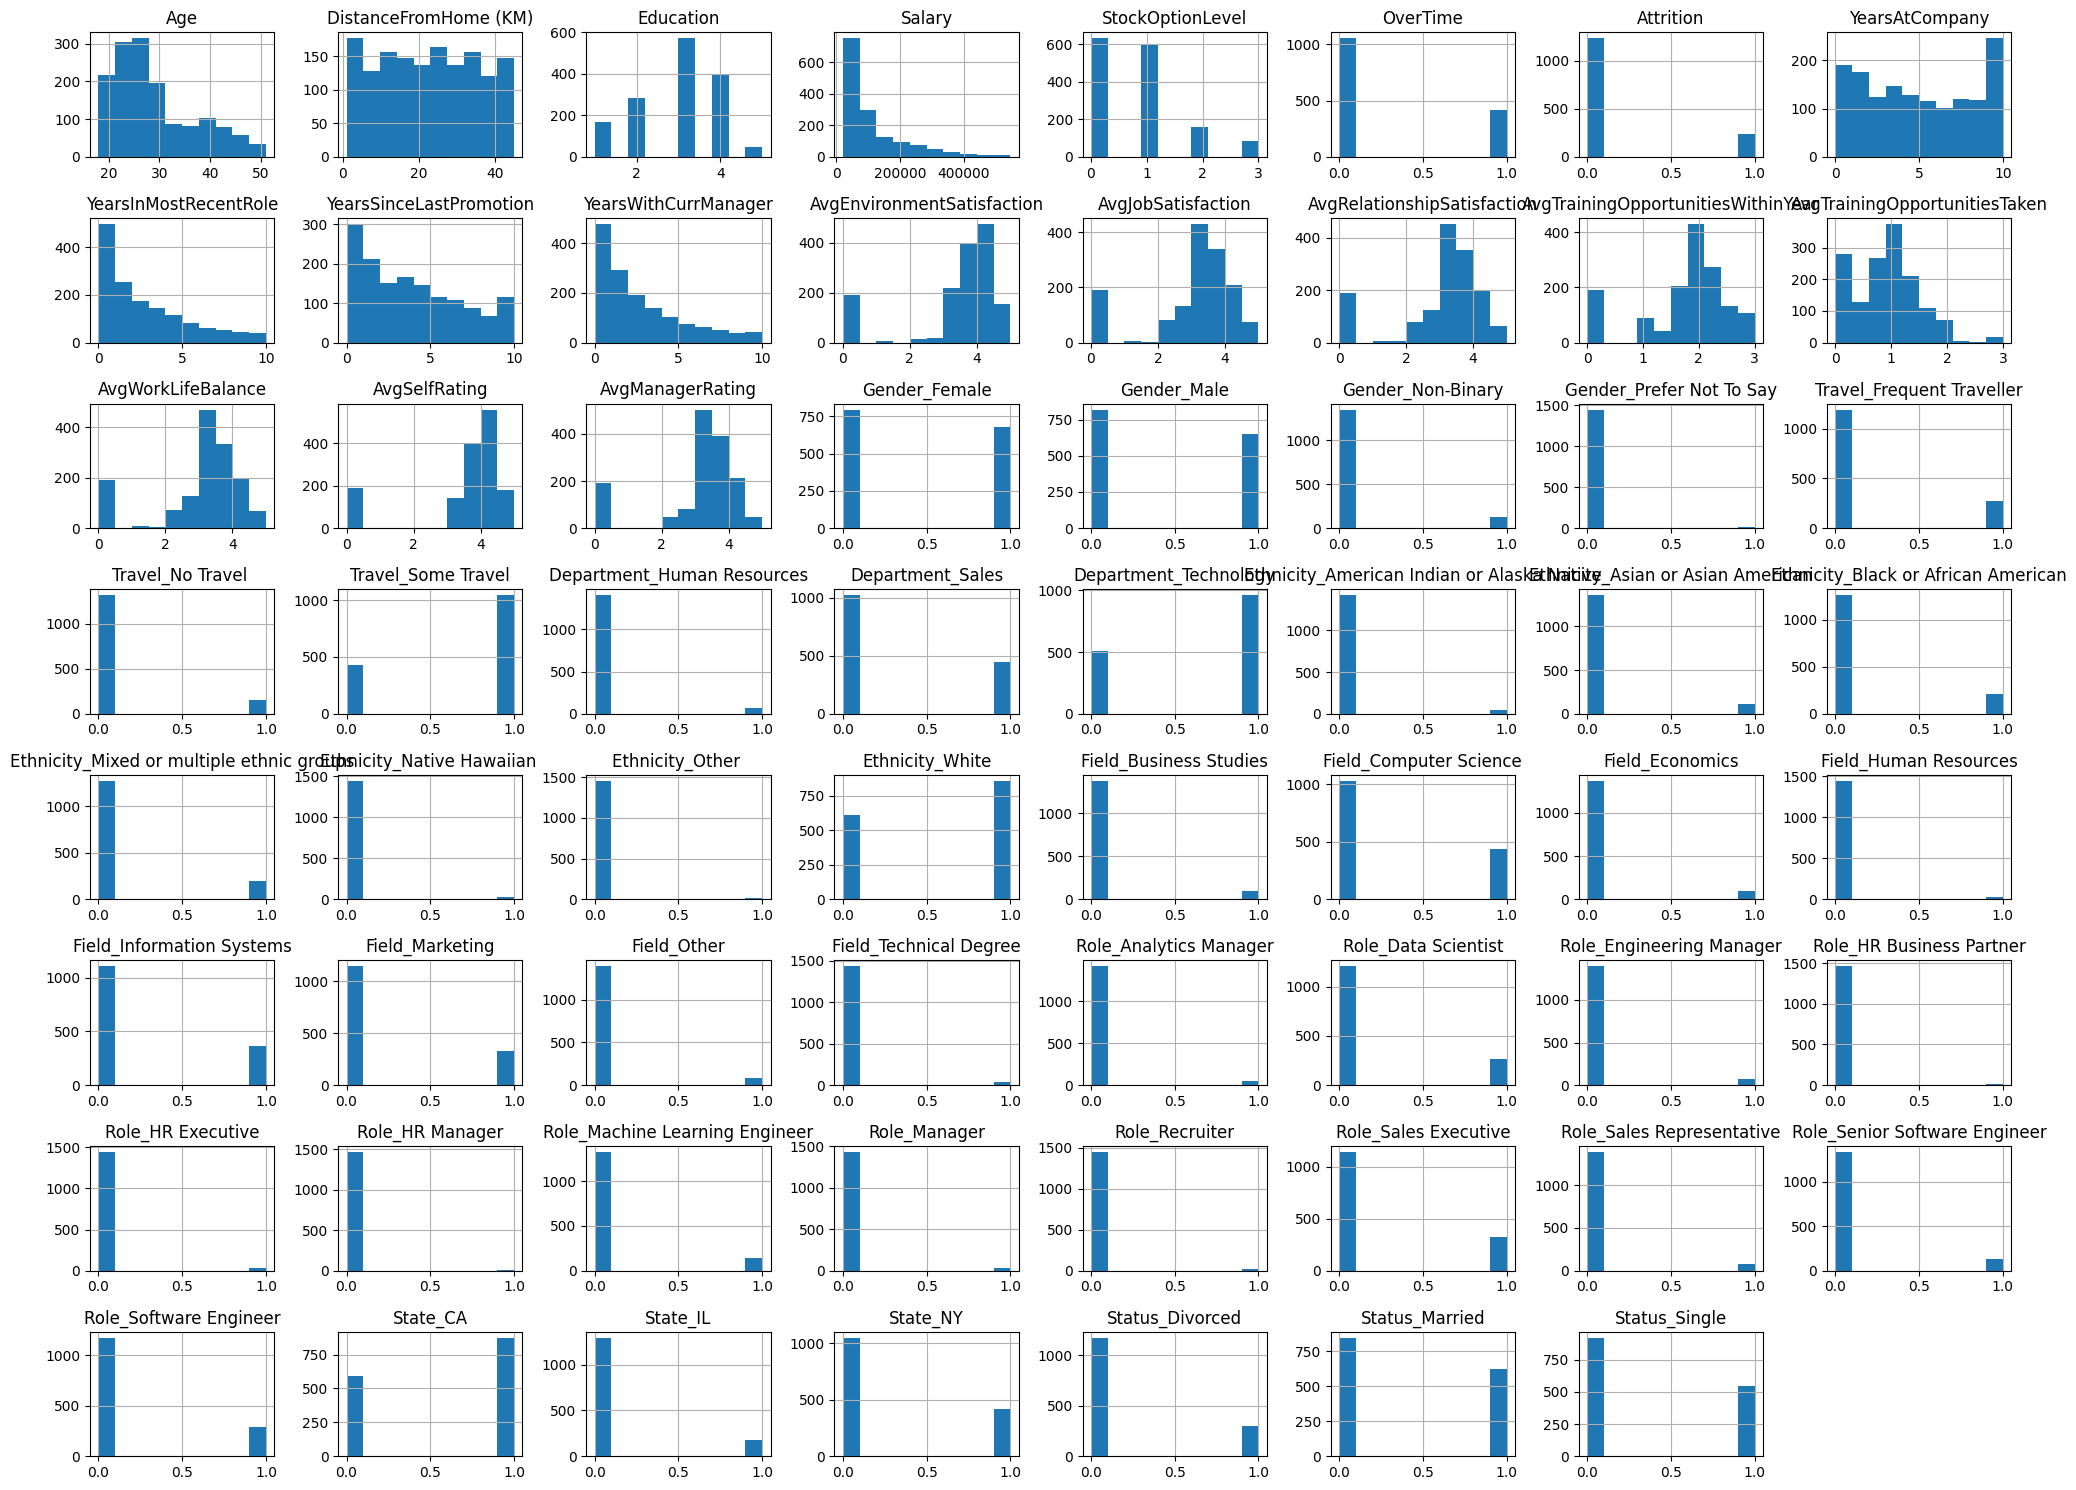

In [46]:
emp_df.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

##2. Model Training

In [47]:


X, y = emp_df.drop('Attrition', axis=1), emp_df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestClassifier(n_jobs = 16)

model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=16)

In [48]:

logmodel = LogisticRegression(max_iter=10000, random_state=0)
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000, random_state=0)

In [49]:
model.score(X_test, y_test)

0.9489795918367347

In [50]:
logmodel.score(X_test, y_test)

0.8843537414965986

In [51]:
sorted_importances = dict(sorted(zip(model.feature_names_in_, model.feature_importances_), key = lambda x: x[1], reverse = True))
sorted_importances

{'YearsAtCompany': 0.12489104875281995,
 'YearsSinceLastPromotion': 0.092064656667931608,
 'AvgManagerRating': 0.061399166451759211,
 'AvgJobSatisfaction': 0.060759086487012351,
 'AvgTrainingOpportunitiesWithinYear': 0.05583379539839757,
 'AvgSelfRating': 0.049749619532060335,
 'AvgEnvironmentSatisfaction': 0.048279761200590382,
 'AvgWorkLifeBalance': 0.04619945378613971,
 'YearsInMostRecentRole': 0.040253684426861523,
 'Salary': 0.038578701204637154,
 'AvgTrainingOpportunitiesTaken': 0.037545513143856041,
 'YearsWithCurrManager': 0.03588492904831133,
 'Age': 0.035619486619898166,
 'AvgRelationshipSatisfaction': 0.035170960153413061,
 'OverTime': 0.029604095715520331,
 'DistanceFromHome (KM)': 0.024976614648263503,
 'StockOptionLevel': 0.019164289654319499,
 'Education': 0.010472102416648419,
 'Role_Data Scientist': 0.0095443961611865365,
 'Status_Single': 0.0092442541189789885,
 'Travel_Frequent Traveller': 0.0084824344280529668,
 'Ethnicity_White': 0.0067678728542151035,
 'Gender_Mal

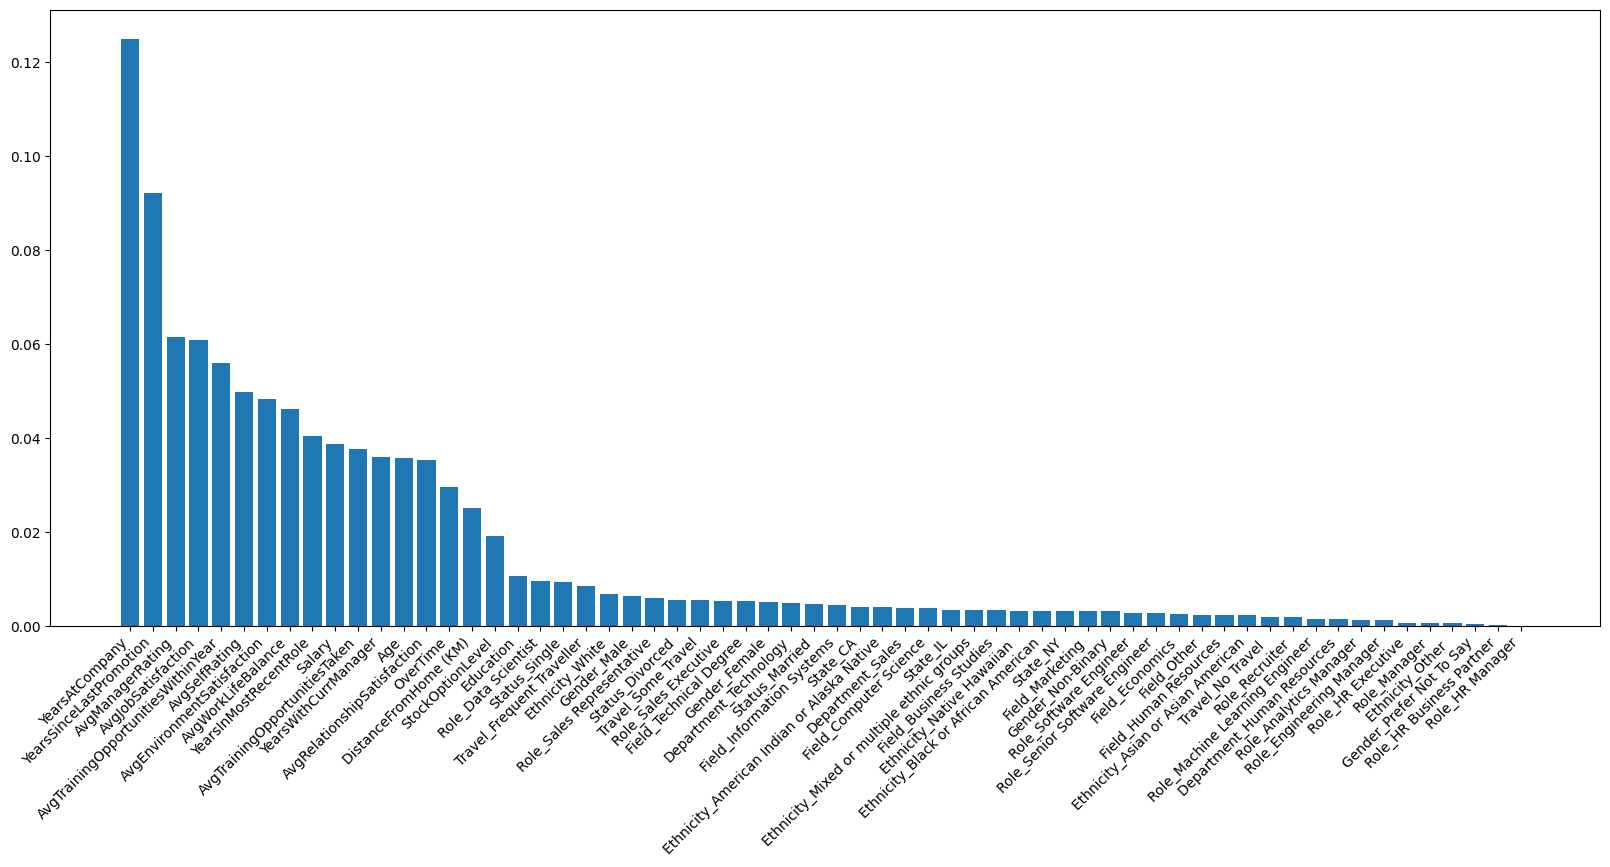

In [52]:
plt.figure(figsize=(20,8))
plt.bar(sorted_importances.keys(), sorted_importances.values())
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [53]:

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       249
           1       1.00      0.67      0.80        45

    accuracy                           0.95       294
   macro avg       0.97      0.83      0.89       294
weighted avg       0.95      0.95      0.94       294



In [54]:
y_pred2 = logmodel.predict(X_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       249
           1       0.66      0.51      0.57        45

    accuracy                           0.88       294
   macro avg       0.79      0.73      0.75       294
weighted avg       0.88      0.88      0.88       294

